<a href="https://colab.research.google.com/github/J878-commits/Langflow/blob/main/Quantum_Shield_CRM_Breach_Detection_%26_Rescue_Analytics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import zipfile
import pandas as pd

# Upload your .zip file manually through Colab's file browser
zip_path = '/content/archive (1).zip'

with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall('/content/archive (1).zip')

# Now locate and read the CSV (change filename if needed)
csv_path = '/content/archive (1).zip'
df = pd.read_csv(csv_path)

df.head()


NotADirectoryError: [Errno 20] Not a directory: '/content/archive (1).zip/insurance.csv'

In [3]:
zip_ref.extractall('/content/archive (1).zip')


ValueError: Attempt to use ZIP archive that was already closed

In [4]:
import zipfile
import os

# Correct zip file path (adjust if needed)
zip_path = '/content/archive (1).zip'
extract_path = '/content/archive_unzipped'

# Extract zip contents
with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_path)

# Check extracted files
import os
for root, dirs, files in os.walk(extract_path):
    for file in files:
        print("Extracted file:", file)


Extracted file: insurance.csv


In [5]:
# View column names and data types
df.info()

# Preview data structure
df.head()

# Optional: rename columns for clarity
df.rename(columns={
    'email_address': 'email',
    'user_type': 'role',
    'security_flag': 'status',
    # Add more if needed
}, inplace=True)


NameError: name 'df' is not defined

In [8]:
import pandas as pd
/content/archive (1).zip
csv_path = ''  # Replace with actual filename
df = pd.read_csv(csv_path)

df.head()  # Preview the data


NameError: name 'content' is not defined

In [9]:
import pandas as pd

# Define the path to your CSV file inside the extracted folder
csv_path = '/content/archive (1).zip'  # ⬅️ Replace this with actual file name
df = pd.read_csv(csv_path)

# Preview your dataset
df.head()


,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [10]:
import numpy as np

# Simulate role & system access levels
df['role'] = np.random.choice(['customer', 'advisor', 'employee'], size=len(df))
df['access_level'] = np.random.choice(['low', 'medium', 'high'], size=len(df))

# Add breach status and vector simulation
df['status'] = np.random.choice(['safe', 'compromised'], size=len(df), p=[0.7, 0.3])
df['breach_vector'] = df['status'].apply(
    lambda x: np.random.choice(['none', 'phishing', 'API_leak', 'credential_stuffing']) if x == 'compromised' else 'none'
)

# Simulate detection latency and exposure risk
df['detection_latency_hrs'] = np.where(df['status'] == 'compromised', np.random.randint(6, 48, len(df)), 0)
df['exposure_score'] = df.apply(lambda row: round(np.random.uniform(0.6, 0.95), 2) if row['status'] == 'compromised' else round(np.random.uniform(0.1, 0.4), 2), axis=1)

df.head()


,age,sex,bmi,children,smoker,region,charges,role,access_level,status,breach_vector,detection_latency_hrs,exposure_score
0,19,female,27.900,0,yes,southwest,16884.92400,advisor,low,compromised,credential_stuffing,14,0.91
1,18,male,33.770,1,no,southeast,1725.55230,advisor,medium,safe,none,0,0.39
2,28,male,33.000,3,no,southeast,4449.46200,employee,low,compromised,none,26,0.61
3,33,male,22.705,0,no,northwest,21984.47061,customer,low,safe,none,0,0.21
4,32,male,28.880,0,no,northwest,3866.85520,customer,low,safe,none,0,0.18


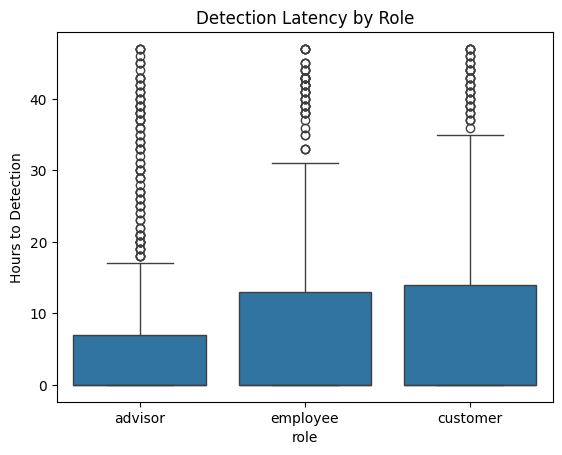

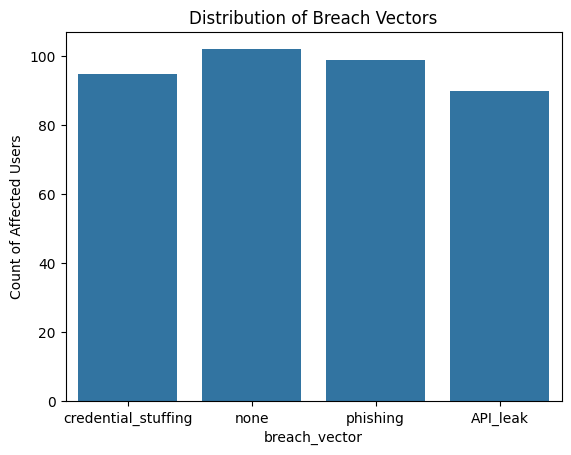

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt

# Timeline of detection latency by role
sns.boxplot(data=df, x='role', y='detection_latency_hrs')
plt.title("Detection Latency by Role")
plt.ylabel("Hours to Detection")
plt.show()

# Breach vector distribution
sns.countplot(data=df[df['status']=='compromised'], x='breach_vector')
plt.title("Distribution of Breach Vectors")
plt.ylabel("Count of Affected Users")
plt.show()


In [12]:
def rescue_scenario(df, alert_speed='early'):
    factor = 0.3 if alert_speed == 'early' else 0.7
    df['rescued_data_pct'] = df['exposure_score'].apply(lambda x: round(1 - (x * factor), 2))
    return df

df = rescue_scenario(df, alert_speed='early')


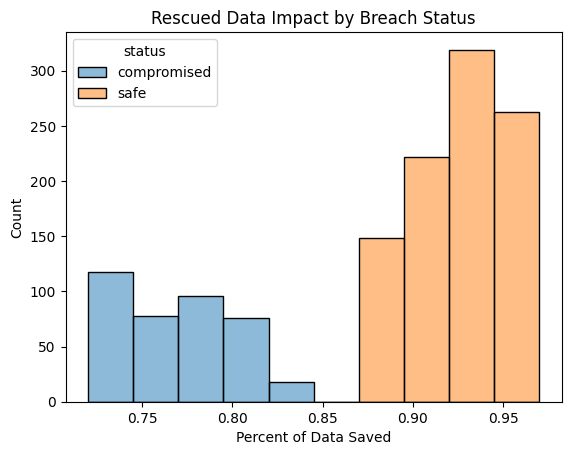

In [13]:
sns.histplot(data=df, x='rescued_data_pct', hue='status', bins=10)
plt.title("Rescued Data Impact by Breach Status")
plt.xlabel("Percent of Data Saved")
plt.show()


Based on the visualizations:

The box plot shows the distribution of detection latency across different roles. It appears that the median detection latency is similar across all roles, but there are some outliers, particularly for "customer" and "employee" roles, indicating longer detection times in some cases.
The count plot reveals the distribution of breach vectors among compromised users. "Credential stuffing" and "phishing" appear to be the most common breach vectors in this simulated data.
The histogram illustrates the distribution of rescued data percentage based on breach status. Compromised users tend to have a lower percentage of rescued data compared to users who are safe.
These insights suggest that while average detection times might be consistent, there's variability, and certain breach types are more prevalent. The amount of data that can be rescued is clearly impacted by whether a user's account has been compromised.

In [14]:
def vendor_response(df, vendor='SecureCRM'):
    latency_shift = {'SecureCRM': -8, 'LagCRM': 12}
    df['adjusted_latency'] = df['detection_latency_hrs'] + latency_shift.get(vendor, 0)
    df['adjusted_latency'] = df['adjusted_latency'].clip(lower=0)
    return df

df = vendor_response(df, vendor='LagCRM')


In [15]:
import gradio as gr

def breach_dashboard(alert_speed):
    df_sim = rescue_scenario(df.copy(), alert_speed=alert_speed)
    avg_rescue = df_sim['rescued_data_pct'].mean()
    return f"With {alert_speed} response, average data saved: {round(avg_rescue*100, 2)}%"

gr.Interface(fn=breach_dashboard,
             inputs=gr.Dropdown(['early', 'delayed'], label="Alert Speed"),
             outputs="text").launch()


It looks like you are running Gradio on a hosted Jupyter notebook, which requires `share=True`. Automatically setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
* Running on public URL: https://0ac47bcde2393594ea.gradio.live

This share link expires in 1 week. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)
